# Fremont Bridge Bike Traffic Analysis

### William Gray

First, save data location URL so we can access anytime

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    df = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True)
    df.columns = ['West', 'East']
    df['Total'] = df['West'] + df['East']
    return df

In [3]:
df = get_fremont_data()

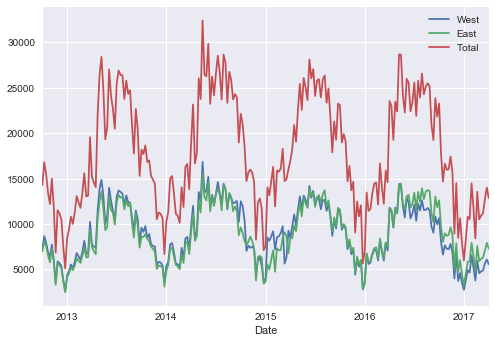

In [4]:
df.resample('W').sum().plot()

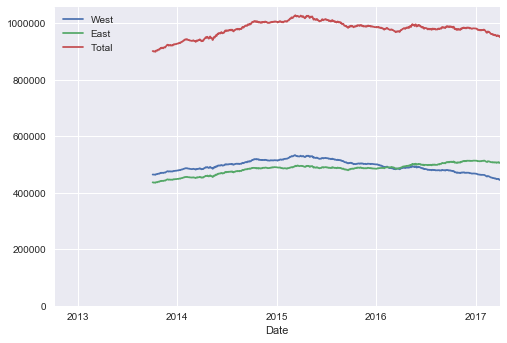

In [5]:
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None); # sets y axis to 0 at bottom, and automatic at top

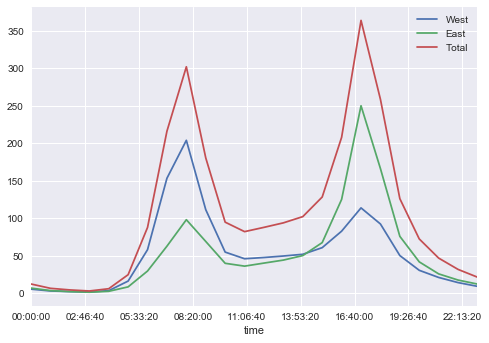

In [6]:
df.groupby(df.index.time).mean().plot()

In [7]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


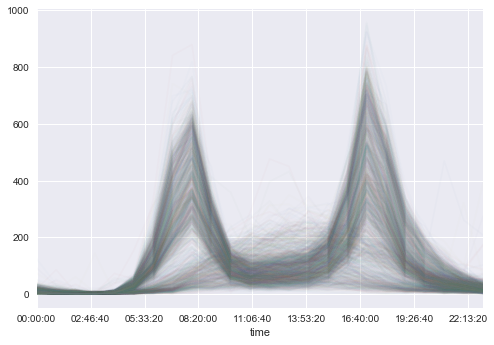

In [8]:
pivoted.plot(legend=False, alpha=0.02);